In [1]:
# Setting up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.model_selection import train_test_split # splitting data
from sklearn.neighbors import KNeighborsRegressor    # regressor
from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline           # for making pipelines
from sklearn.neighbors import KNeighborsClassifier   # for KNeighborsClassifier model
from sklearn.tree import DecisionTreeClassifier      # for Decision Tree model
from sklearn.metrics import accuracy_score           # for accuracy_score
# add Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
# Use cross validation (`cross_val_score`) to test a classifier 
# across 10 different splits of the data
# Use a K value of 3 for your KNN.
# Notice the huge variation in performance across folds!
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures


# ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_1415 = pd.read_csv('./data/1415.csv')
data_1516 = pd.read_csv('./data/1516.csv')
data_1617 = pd.read_csv('./data/1617.csv')
data_1718 = pd.read_csv('./data/1718.csv')
data_1819 = pd.read_csv('./data/1819.csv')

In [3]:
def clean_data(df):
    data = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST']]
    data['HSGR'] = data['FTHG']/data['HS']
    data['ASGR'] = data['FTAG']/data['AS']
    data = data.replace([np.inf, -np.inf], 0)
    
#     bet_data = df[['B365H', 'B365D', 'B365A',
#                  'BWH'  , 'BWD'  , 'BWA'  ,
#                  'IWH'  , 'IWD'  , 'IWA'  ,
#                  'LBH'  , 'LBD'  , 'LBA'  , 
#                  'PSH'  , 'PSD'  , 'PSA'  , 
#                  'SJH'  , 'SJD'  , 'SJA'  , 
#                  'VCH'  , 'VCD'  , 'VCA'  , 
#                  'WHH'  , 'WHD'  , 'WHA'  ]]
    bet_home = df[['B365H','BWH','IWH','PSH','VCH','WHH']].mean(axis=1)
    bet_draw = df[['B365D','BWD','IWD','PSD','VCD','WHD']].mean(axis=1)
    bet_away = df[['B365A','BWA','IWA','PSA','VCA','WHA']].mean(axis=1)
    
    
    data['odd_home'] = bet_home
    data['odd_draw'] = bet_draw
    data['odd_away'] = bet_away
    
    data.dropna(axis=0)
    
    return data

In [4]:
data = data_1415
data = data.append(data_1516)
data = data.append(data_1617)
data = data.append(data_1718)
data = clean_data(data)

In [5]:
data_1415 = clean_data(pd.read_csv('./data/1415.csv'))
data_1415.drop(data_1415.tail(1).index,inplace=True)
data_1516 = clean_data(pd.read_csv('./data/1516.csv'))
data_1617 = clean_data(pd.read_csv('./data/1617.csv'))
data_1718 = clean_data(pd.read_csv('./data/1718.csv'))
data_1819 = clean_data(pd.read_csv('./data/1819.csv'))

In [6]:
data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HSGR,ASGR,odd_home,odd_draw,odd_away
0,Arsenal,Crystal Palace,2.0,1.0,H,14.0,4.0,6.0,2.0,0.142857,0.250000,1.260000,5.866667,12.085000
1,Leicester,Everton,2.0,2.0,D,11.0,13.0,3.0,3.0,0.181818,0.153846,3.073333,3.296667,2.393333
2,Man United,Swansea,1.0,2.0,A,14.0,5.0,5.0,4.0,0.071429,0.400000,1.363333,4.925000,9.600000
3,QPR,Hull,0.0,1.0,A,19.0,11.0,6.0,4.0,0.000000,0.090909,2.488333,3.193333,3.015000
4,Stoke,Aston Villa,0.0,1.0,A,12.0,7.0,2.0,2.0,0.000000,0.142857,1.958333,3.345000,4.250000
5,West Brom,Sunderland,2.0,2.0,D,10.0,7.0,5.0,2.0,0.200000,0.285714,2.251667,3.281667,3.388333
6,West Ham,Tottenham,0.0,1.0,A,18.0,10.0,4.0,4.0,0.000000,0.100000,3.685000,3.441667,2.076667
7,Liverpool,Southampton,2.0,1.0,H,12.0,12.0,5.0,6.0,0.166667,0.083333,1.351667,5.046667,9.275000
8,Newcastle,Man City,0.0,2.0,A,12.0,13.0,0.0,5.0,0.000000,0.153846,5.200000,3.993333,1.660000
9,Burnley,Chelsea,1.0,3.0,A,9.0,11.0,2.0,3.0,0.111111,0.272727,8.678333,4.668333,1.401667


In [7]:
def average_betting(df):
    betting_accuracies = []
    for index, row in df.iterrows():
        if(row['FTR'] == 'H' and row['odd_home'] < row['odd_away'] and row['odd_home'] < row['odd_draw']):
            betting_accuracies.append(1)
        elif(row['FTR'] == 'D' and row['odd_draw'] < row['odd_away'] and row['odd_draw'] < row['odd_home']):
            betting_accuracies.append(1)
        elif(row['FTR'] == 'A' and row['odd_away'] < row['odd_home'] and row['odd_away'] < row['odd_draw']):
            betting_accuracies.append(1)
        else:
            betting_accuracies.append(0)
        
    return np.mean(betting_accuracies)
        
        

In [8]:
time = [average_betting(data_1415),
        average_betting(data_1516), 
        average_betting(data_1617), 
        average_betting(data_1718), 
        average_betting(data_1819)]

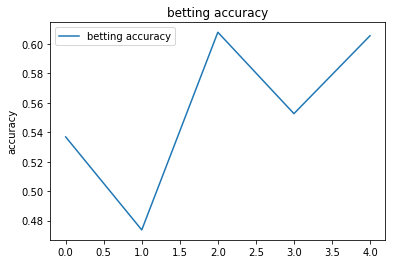

In [9]:
plt.plot(time, label='betting accuracy')
plt.legend()
plt.title('betting accuracy')
plt.ylabel('accuracy')
plt.show()

We expected that the accuracy would increase, but there is no pattern on betting accuracy over time.

In [10]:
def accuracy(df):
    home = 0
    draw = 0
    away = 0
    for index, row in df.iterrows():
        if(row['odd_home'] < row['odd_away'] and row['odd_home'] < row['odd_draw']):
            home = home+1
        elif(row['odd_draw'] < row['odd_away'] and row['odd_draw'] < row['odd_home']):
            draw = draw+1
        else:
            away = away+1
            
    return [home/len(df), draw/len(df), away/len(df)]

[0.4486607142857143, 0.0, 0.5513392857142857]


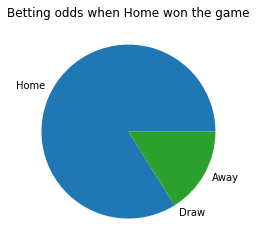

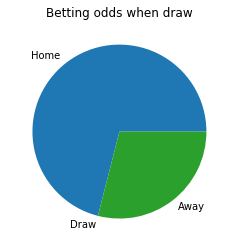

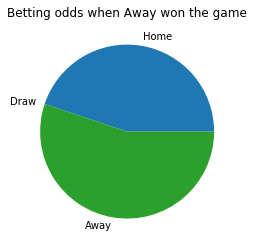

In [11]:
print(accuracy(data.loc[data['FTR'] == 'A']))
plt.pie(accuracy(data.loc[data['FTR'] == 'H']), labels=['Home', 'Draw', 'Away'])
plt.title('Betting odds when Home won the game')
plt.show()
plt.pie(accuracy(data.loc[data['FTR'] == 'D']), labels=['Home', 'Draw', 'Away'])
plt.title('Betting odds when draw')
plt.show()
plt.pie(accuracy(data.loc[data['FTR'] == 'A']), labels=['Home', 'Draw', 'Away'])
plt.title('Betting odds when Away won the game')
plt.show()

In [12]:
plt.pie()

TypeError: pie() missing 1 required positional argument: 'x'

In [ ]:
# Arsenal
# Man United
# Chelsea
# Liverpool
# Tottenham
# Man City

In [ ]:
data_1415
data_1516
data_1617
data_1718
data_1819

In [ ]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(data_1415, figsize=(10,10))